# Plotting some results from isotope sampling at M-17 ice cave

In [1]:
cd ..

/Users/AchilleTalon/Documents/GitHub/ice-accummulation-M17


In [2]:
# first input some library imports
import pandas as pd
import matplotlib.pyplot as plt
import pyleoclim as pyleo
import numpy as np
import seaborn as sns

from calendar import month_abbr

# import local library
import scripts.GNIP as gnip

In [3]:
pd.set_option('precision', 2)
pyleo.utils.plotting.set_style('journal')

## Plotting samples against local meteoric waterline

In [4]:
# read the data from the isotope sampling at Migovec, into a pandas dataframe
cave = gnip.ReadCustom('data/isotopes/isotopes_migovec.csv')

In [5]:
# read the data from GNIP into a dataframe
regional = gnip.ReadArchive('data/isotopes/GNIP_archive_slovenia.csv')

Now that the different modules and their respective functions are loaded, we are ready to explore the data and plot the results in d2H/d18O space.

In [6]:
cave.head()

s.d. height  d18O  \
cave protocol transect samplename column height (cm)                      
M15  DRIP     -999.0   MIG-77D    -999.0                   -999.0 -9.06   
                       MIG-78D    -999.0                   -999.0 -8.89   
     FIRN      2.0     MIG-71      200.0                      5.0 -5.92   
                       MIG-72      220.0                      5.0 -5.51   
                       MIG-73      240.0                      5.0 -5.09   

                                                      s.d. d18O    d2H  \
cave protocol transect samplename column height (cm)                     
M15  DRIP     -999.0   MIG-77D    -999.0                   0.08 -58.00   
                       MIG-78D    -999.0                   0.06 -56.67   
     FIRN      2.0     MIG-71      200.0                   0.04 -36.43   
                       MIG-72      220.0                   0.08 -33.52   
                       MIG-73      240.0                   0.05 -30.48   

                                                      s.d. d2H  layer   \
cave protocol transect samplename column height (cm)                     
M15  DRIP     -999.0   MIG-77D    -999.0                  0.33  -999.0   
                       MIG-78D    -999.0                  0.28  -999.0   
     FIRN      2.0     MIG-71      200.0                  0.33     5.0   
                       MIG-72      220.0                  0.25     5.0   
                       MIG-73      240.0                  0.11     5.0   

                                                      layer type  d-excess  \
cave protocol transect samplename column height (cm)                         
M15  DRIP     -999.0   MIG-77D    -999.0                  -999.0     14.48   
                       MIG-78D    -999.0                  -999.0     14.45   
     FIRN      2.0     MIG-71      200.0                     0.0     10.93   
                       MIG-72      220.0                     0.0     10.56   
                       MIG-73      240.0                     0.0     10.24   

                                                      s.d. d-excess  
cave protocol transect samplename column height (cm)                 
M15  DRIP     -999.0   MIG-77D    -999.0                       0.34  
                       MIG-78D    -999.0                       0.29  
     FIRN      2.0     MIG-71      200.0                       0.33  
                       MIG-72      220.0                       0.26  
                       MIG-73      240.0                       0.12

Figure saved at: "outputs/f07.pdf"


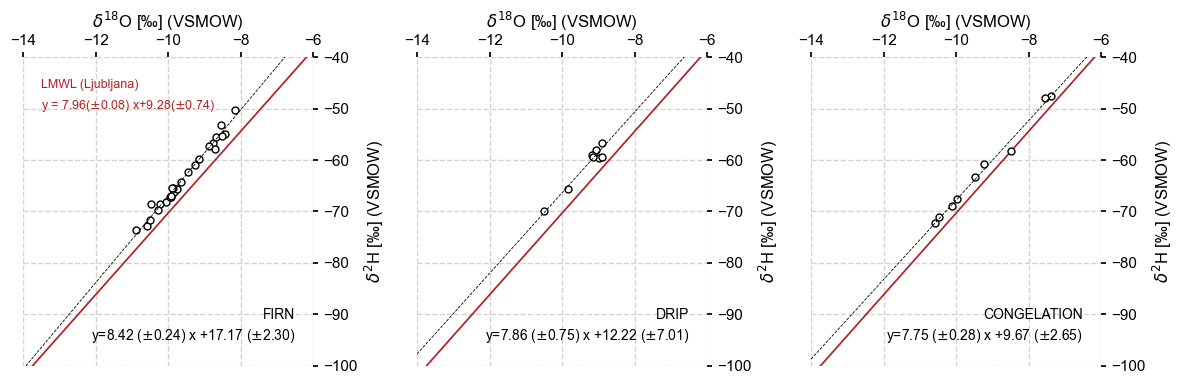

In [35]:
## set up the figure environment
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,4))

## perform some sub-sampling of M-17 isotope data to be plotted
# firn samples from M-17 cave
firn = cave.loc[('M17','FIRN')].copy()

# dripwater from M-17 and M-15
drip = cave.xs('DRIP', level=1, drop_level=False).copy()

# congelation ice (both from floor and speleothems)
congel = pd.concat((cave.loc[('M17','ICICLE'),:].query('d18O >-12'),
           cave.loc[('M17','MELTICE'),:].query('d18O >-12'))).copy()

labels = ("FIRN","DRIP","CONGELATION")

for dat,ax,l in zip((firn,drip,congel),(ax1,ax2,ax3), labels):
    
    # make arrays of the isotopic data
    xi,yi =dat['d18O'].to_numpy(),dat['d2H'].to_numpy()
    # compute the PWLSR locally to get the coefficients and plot them
    f,coeffs = gnip.PWLSR(regional,'LJUBLJANA')
    
    # call the custom plotting function on each dataset
    gnip.PlotLMWL(ax,regional,'LJUBLJANA',xi,yi,l,(-6.5,-95),**{'ha':'right'})
    
    ax.set_xlim(-14,-6)
    ax.set_ylim(-100,-40)


# plot the local meteoric waterline equation but only on the first subplot
ax1.text(-13.5,-46, 'LMWL (Ljubljana)', color = 'firebrick', fontsize = 9)
ax1.text(-13.5,-50,color = 'firebrick',fontsize = 9,
         s ="y = {:.2f}($\pm${:.2f}) x+{:.2f}($\pm${:.2f})"\
         .format(coeffs['slope'],
                 coeffs['$\\sigma_{a(w)}$'],
                 coeffs['intercept'],
                 coeffs['$\\sigma_{b(w)}$']))


plt.tight_layout()
pyleo.savefig(fig,"outputs/f07.pdf", settings = {'dpi':300})
#plt.savefig("../reports/M17_manuscript/figures/FIGURE_7.pdf", dpi =350)
pyleo.showfig(fig)
pyleo.closefig(fig)

## Plotting Ljubljana basic statistics

In [8]:
lj = regional.loc['LJUBLJANA'].copy()

In [9]:
lj['d-excess'] = lj['H2']-lj['O18']*8

In [10]:
lj

,Latitude,Longitude,Altitude,Begin of Period,End of Period,O18,H2,Precipitation,Air Temperature,Vapour Pressure,d-excess
Date,,,,,,,,,,,
1984-01-15,46.09,14.6,282,1984-01-01,1984-01-31,-13.11,-96.0,166.0,-0.5,5.4,8.88
1984-02-15,46.09,14.6,282,1984-02-01,1984-02-29,-14.12,-104.0,113.0,0.3,4.9,8.96
1984-03-15,46.09,14.6,282,1984-03-01,1984-03-31,-11.83,-85.0,64.0,4.3,5.3,9.64
1984-04-15,46.09,14.6,282,1984-04-01,1984-04-30,-10.67,-74.0,61.0,9.2,7.2,11.36
1984-05-15,46.09,14.6,282,1984-05-01,1984-05-31,-7.27,-52.0,137.0,12.8,10.7,6.16
...,...,...,...,...,...,...,...,...,...,...,...
2010-08-15,46.09,14.6,282,2010-08-01,2010-08-31,-6.26,-39.4,110.0,NaN,NaN,10.68
2010-09-15,46.09,14.6,282,2010-09-01,2010-09-30,NaN,NaN,360.0,NaN,NaN,NaN
2010-10-15,46.09,14.6,282,2010-10-01,2010-10-31,-7.51,-42.1,91.0,NaN,NaN,17.98


In [11]:
# a supplementary figure for the boxplots of precip by quarter.
def Monthly(var):
    monthly = np.array([lj.loc[lj.index.month == i+1][var].dropna().to_numpy() for i in range(12)],dtype = object)
    return monthly

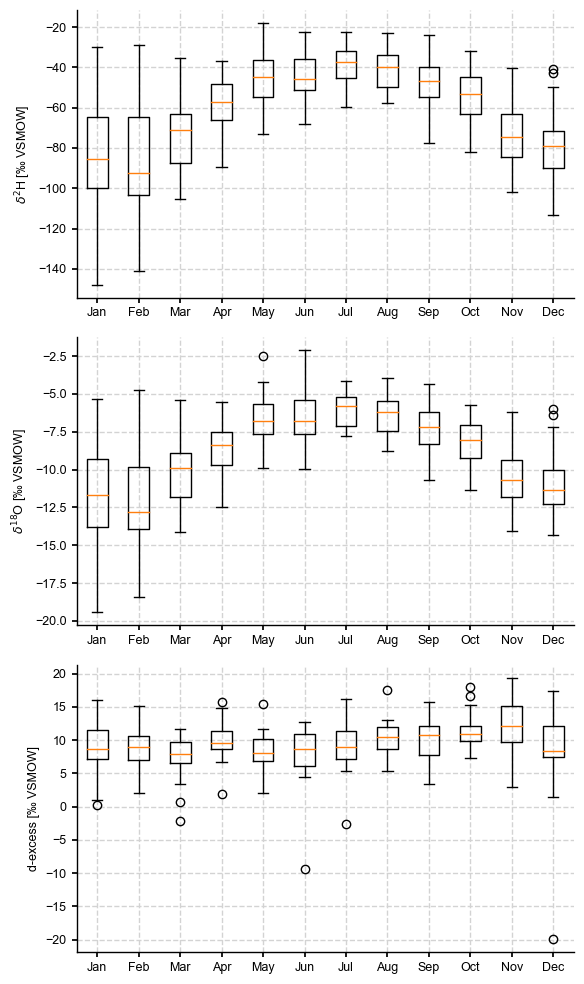

Figure saved at: "outputs/sf10.pdf"
Figure saved at: "../reports/M17_manuscript/figures/sf10.pdf"


In [53]:
fig, axes = plt.subplots(3,1,figsize = (6,10))

m = [i for i in month_abbr][1:]

varlabels = {'H2':'$\delta^2$H [‰ VSMOW]',
       'O18':'$\delta^{18}$O [‰ VSMOW]',
       'd-excess': 'd-excess [‰ VSMOW]'}

for ax,(var,label) in zip(axes, varlabels.items()):
    ax.boxplot(Monthly(var),labels =m)
    ax.set_ylabel(label,fontsize = 9)
    ax.tick_params(axis='both', which='major', labelsize=9)

plt.tight_layout()
pyleo.showfig(fig)
pyleo.savefig(fig,'outputs/sf10.pdf',settings = {'dpi':300})
pyleo.savefig(fig,'../reports/M17_manuscript/figures/sf10.pdf',settings = {'dpi':300})
pyleo.closefig()

<ipython-input-54-1b2bc8b6f4e8>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


Figure saved at: "../reports/M17_manuscript/figures/sf11.pdf"


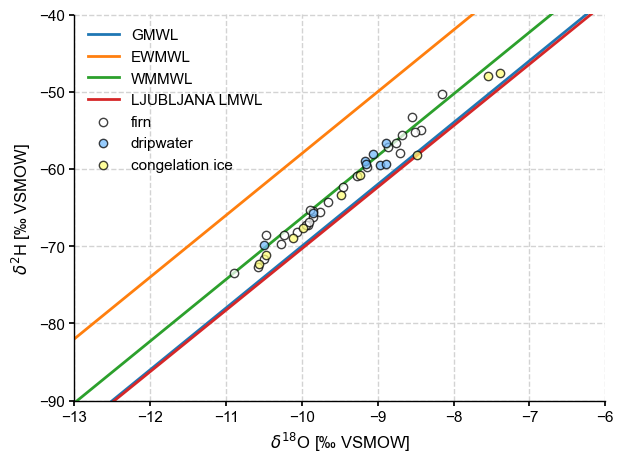

In [54]:
fig, ax = plt.subplots()

xi = np.arange(-20,0,0.5)

def WL(a,d):
    return lambda x: a*x+d

for d,l in zip((10,22,13.7),('GMWL','EWMWL','WMMWL')):
    f = WL(8,d)
    ax.plot(xi,f(xi), label = l)

f_lj = WL(coeffs['slope'],coeffs['intercept'])
ax.plot(xi,f_lj(xi), label = 'LJUBLJANA LMWL')
ax.scatter(firn.d18O,firn.d2H,color = 'white', edgecolor = 'black', zorder = 100, label = 'firn', alpha = 0.75)
ax.scatter(drip.d18O,drip.d2H,color = 'xkcd:sky blue', edgecolor = 'black', zorder = 100, label = 'dripwater', alpha = 0.75)
ax.scatter(congel.d18O,congel.d2H,color = 'xkcd:light yellow', edgecolor = 'black', zorder = 100, label = 'congelation ice', alpha = 0.75)




ax.set_xlim(-13,-6)
ax.set_ylim(-90,-40)
ax.set_xlabel("$\delta^{18}$O [‰ VSMOW]")
ax.set_ylabel("$\delta^{2}$H [‰ VSMOW]")


ax.legend()
plt.tight_layout()
pyleo.savefig(fig,'../reports/M17_manuscript/figures/sf11.pdf',settings = {'dpi':300})
pyleo.showfig(fig)
pyleo.closefig(fig)

## Linear mixing model between summer and winter precip

In [55]:
# solve equation with linear mixing model by Gaussian elimination 

def SolveA(wint,summ,firn):

    A  = np.array([[wint, summ, firn],[1,1,1]])
    A[0] = A[0]/A[0,0]
    A[1] = A[0]-A[1]
    A[1]  =A[1]/A[1,1]
    A[0]  = A[0]-A[1]*A[0,1]
    
    return(A[0,2],A[1,2])

In [14]:
# what are typical winter/summer values at ljubljana?

wint = lj.loc[(lj.index.month <= 4) | (lj.index.month > 10)].copy()
summ = lj.loc[(lj.index.month >= 5) & (lj.index.month < 11)].copy()

In [15]:
summ.O18.mean()-1.4

-8.263057176447674

In [16]:
# test the robustness of the mixing model
wint_d18O_var = np.random.normal(wint.O18.mean()-1.4,wint.O18.std(),10000)
summ_d18O_var = np.random.normal(summ.O18.mean()-1.4,summ.O18.std(),10000)

wint_d2H_var = np.random.normal(wint.H2.mean()-1.4,wint.H2.std(),10000)
summ_d2H_var = np.random.normal(summ.H2.mean()-7.6,summ.H2.std(),10000)

result_d18O = np.array([SolveA(wi,si,-9.55) for wi,si in zip(wint_d18O_var,summ_d18O_var) if (wi < -9.55) & (si > -9.55)]).transpose()
result_d2H = np.array([SolveA(wi,si,-63.28) for wi,si in zip(wint_d2H_var,summ_d2H_var) if (wi < -63.28) & (si > -63.28)]).transpose()

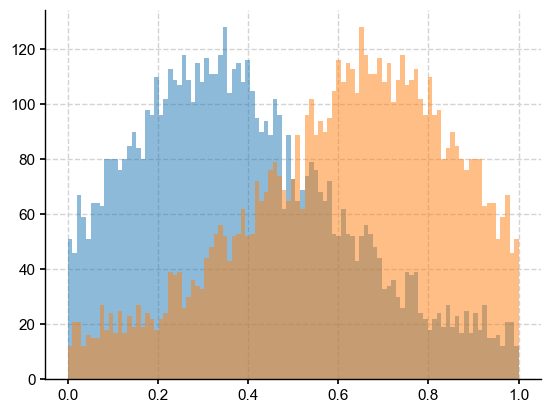

In [193]:
fig, ax = plt.subplots()
ax.hist(result_d18O[0], bins = np.linspace(0,1,100),alpha = 0.5)

ax.hist(result_d18O[1], bins = np.linspace(0,1,100), alpha = 0.5)

pyleo.showfig(fig)
pyleo.closefig(fig)

In [194]:
np.std(result_d18O[0])

0.22912860687458636

In [195]:
np.mean(result_d18O[0])

0.3886140487235146

In [196]:
np.std(result_d18O[1])

0.22912860687458636

In [197]:
np.mean(result_d18O[1])

0.6113859512764853

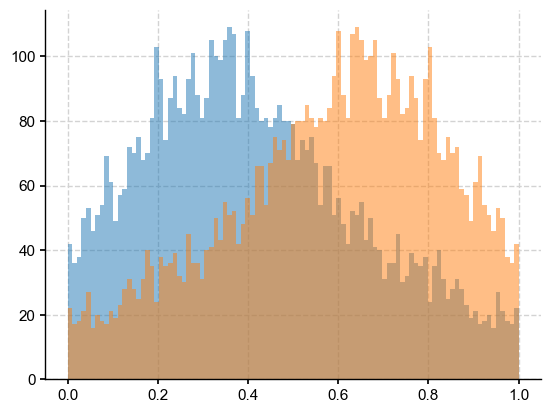

In [198]:
fig, ax = plt.subplots()
ax.hist(result_d2H[0], bins = np.linspace(0,1,100),alpha = 0.5)

ax.hist(result_d2H[1], bins = np.linspace(0,1,100), alpha = 0.5)

pyleo.showfig(fig)
pyleo.closefig(fig)

In [139]:
print(SolveA(wint.O18.mean()-1.4,summ.O18.mean()-1.4,-9.55))
print(SolveA(wint.H2.mean()-7.6,summ.H2.mean()-7.6,-63.28))

(0.3432405195448488, 0.6567594804551512)
(0.3271328535196947, 0.6728671464803053)


In [ ]:
print(SolveA(wint.O18.mean()-1.4,summ.O18.mean()-1.4,-9.55))
print(SolveA(wint.H2.mean()-7.6,summ.H2.mean()-7.6,-63.28))

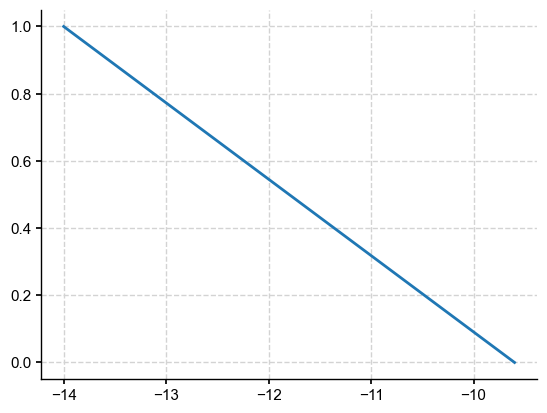

In [117]:
# an example with non-representative values..
fig, ax = plt.subplots()

xi = np.linspace(wint,summ,15)

sol = np.array([
ax.plot(xi,sol[0])

pyleo.showfig(fig)